Problem:- To Classify  If An Individual Is Diabetic Or Non Diabetic . 

Objective:- To Build A Model Which Can Easily Classify Wether An Individual Has Diabeties Or Not 

Aim :- Aim: Develop a robust and accurate predictive model for early detection of diabetes, leveraging machine learning techniques, in order to provide timely and reliable assessments of an individual's likelihood of having diabetes.

Importing Libraries

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings("ignore")

Importing csv file

In [3]:
csv = pd.read_csv(r"C:\Users\Admin\Downloads\Healthcare-Diabetes.csv")

Exploratory Data Analysis (EDA)

In [4]:
csv.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [5]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
csv.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
csv.corr()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.024222,0.015010,0.009717,0.017702,0.007359,0.024007,-0.009695,-0.007404,-0.006298
Pregnancies,-0.024222,1.000000,0.122839,0.147253,-0.068673,-0.075734,0.018761,-0.027731,0.540805,0.223796
Glucose,0.015010,0.122839,1.000000,0.142095,0.061023,0.323445,0.225308,0.127195,0.256958,0.460644
BloodPressure,0.009717,0.147253,0.142095,1.000000,0.201167,0.087823,0.281560,0.048471,0.238684,0.072900
SkinThickness,0.017702,-0.068673,0.061023,0.201167,1.000000,0.445345,0.393494,0.179830,-0.111895,0.075603
Insulin,0.007359,-0.075734,0.323445,0.087823,0.445345,1.000000,0.215926,0.190500,-0.073458,0.123646
BMI,0.024007,0.018761,0.225308,0.281560,0.393494,0.215926,1.000000,0.129766,0.038175,0.280928
DiabetesPedigreeFunction,-0.009695,-0.027731,0.127195,0.048471,0.179830,0.190500,0.129766,1.000000,0.028544,0.160664
Age,-0.007404,0.540805,0.256958,0.238684,-0.111895,-0.073458,0.038175,0.028544,1.000000,0.237050
Outcome,-0.006298,0.223796,0.460644,0.072900,0.075603,0.123646,0.280928,0.160664,0.237050,1.000000


Checking Null Values In Data

In [8]:
csv.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking duplicate values

In [9]:
duplicates = csv.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


Checking Data Imbalance

In [10]:
csv['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

Visualizing Data

<Figure size 3000x1500 with 0 Axes>

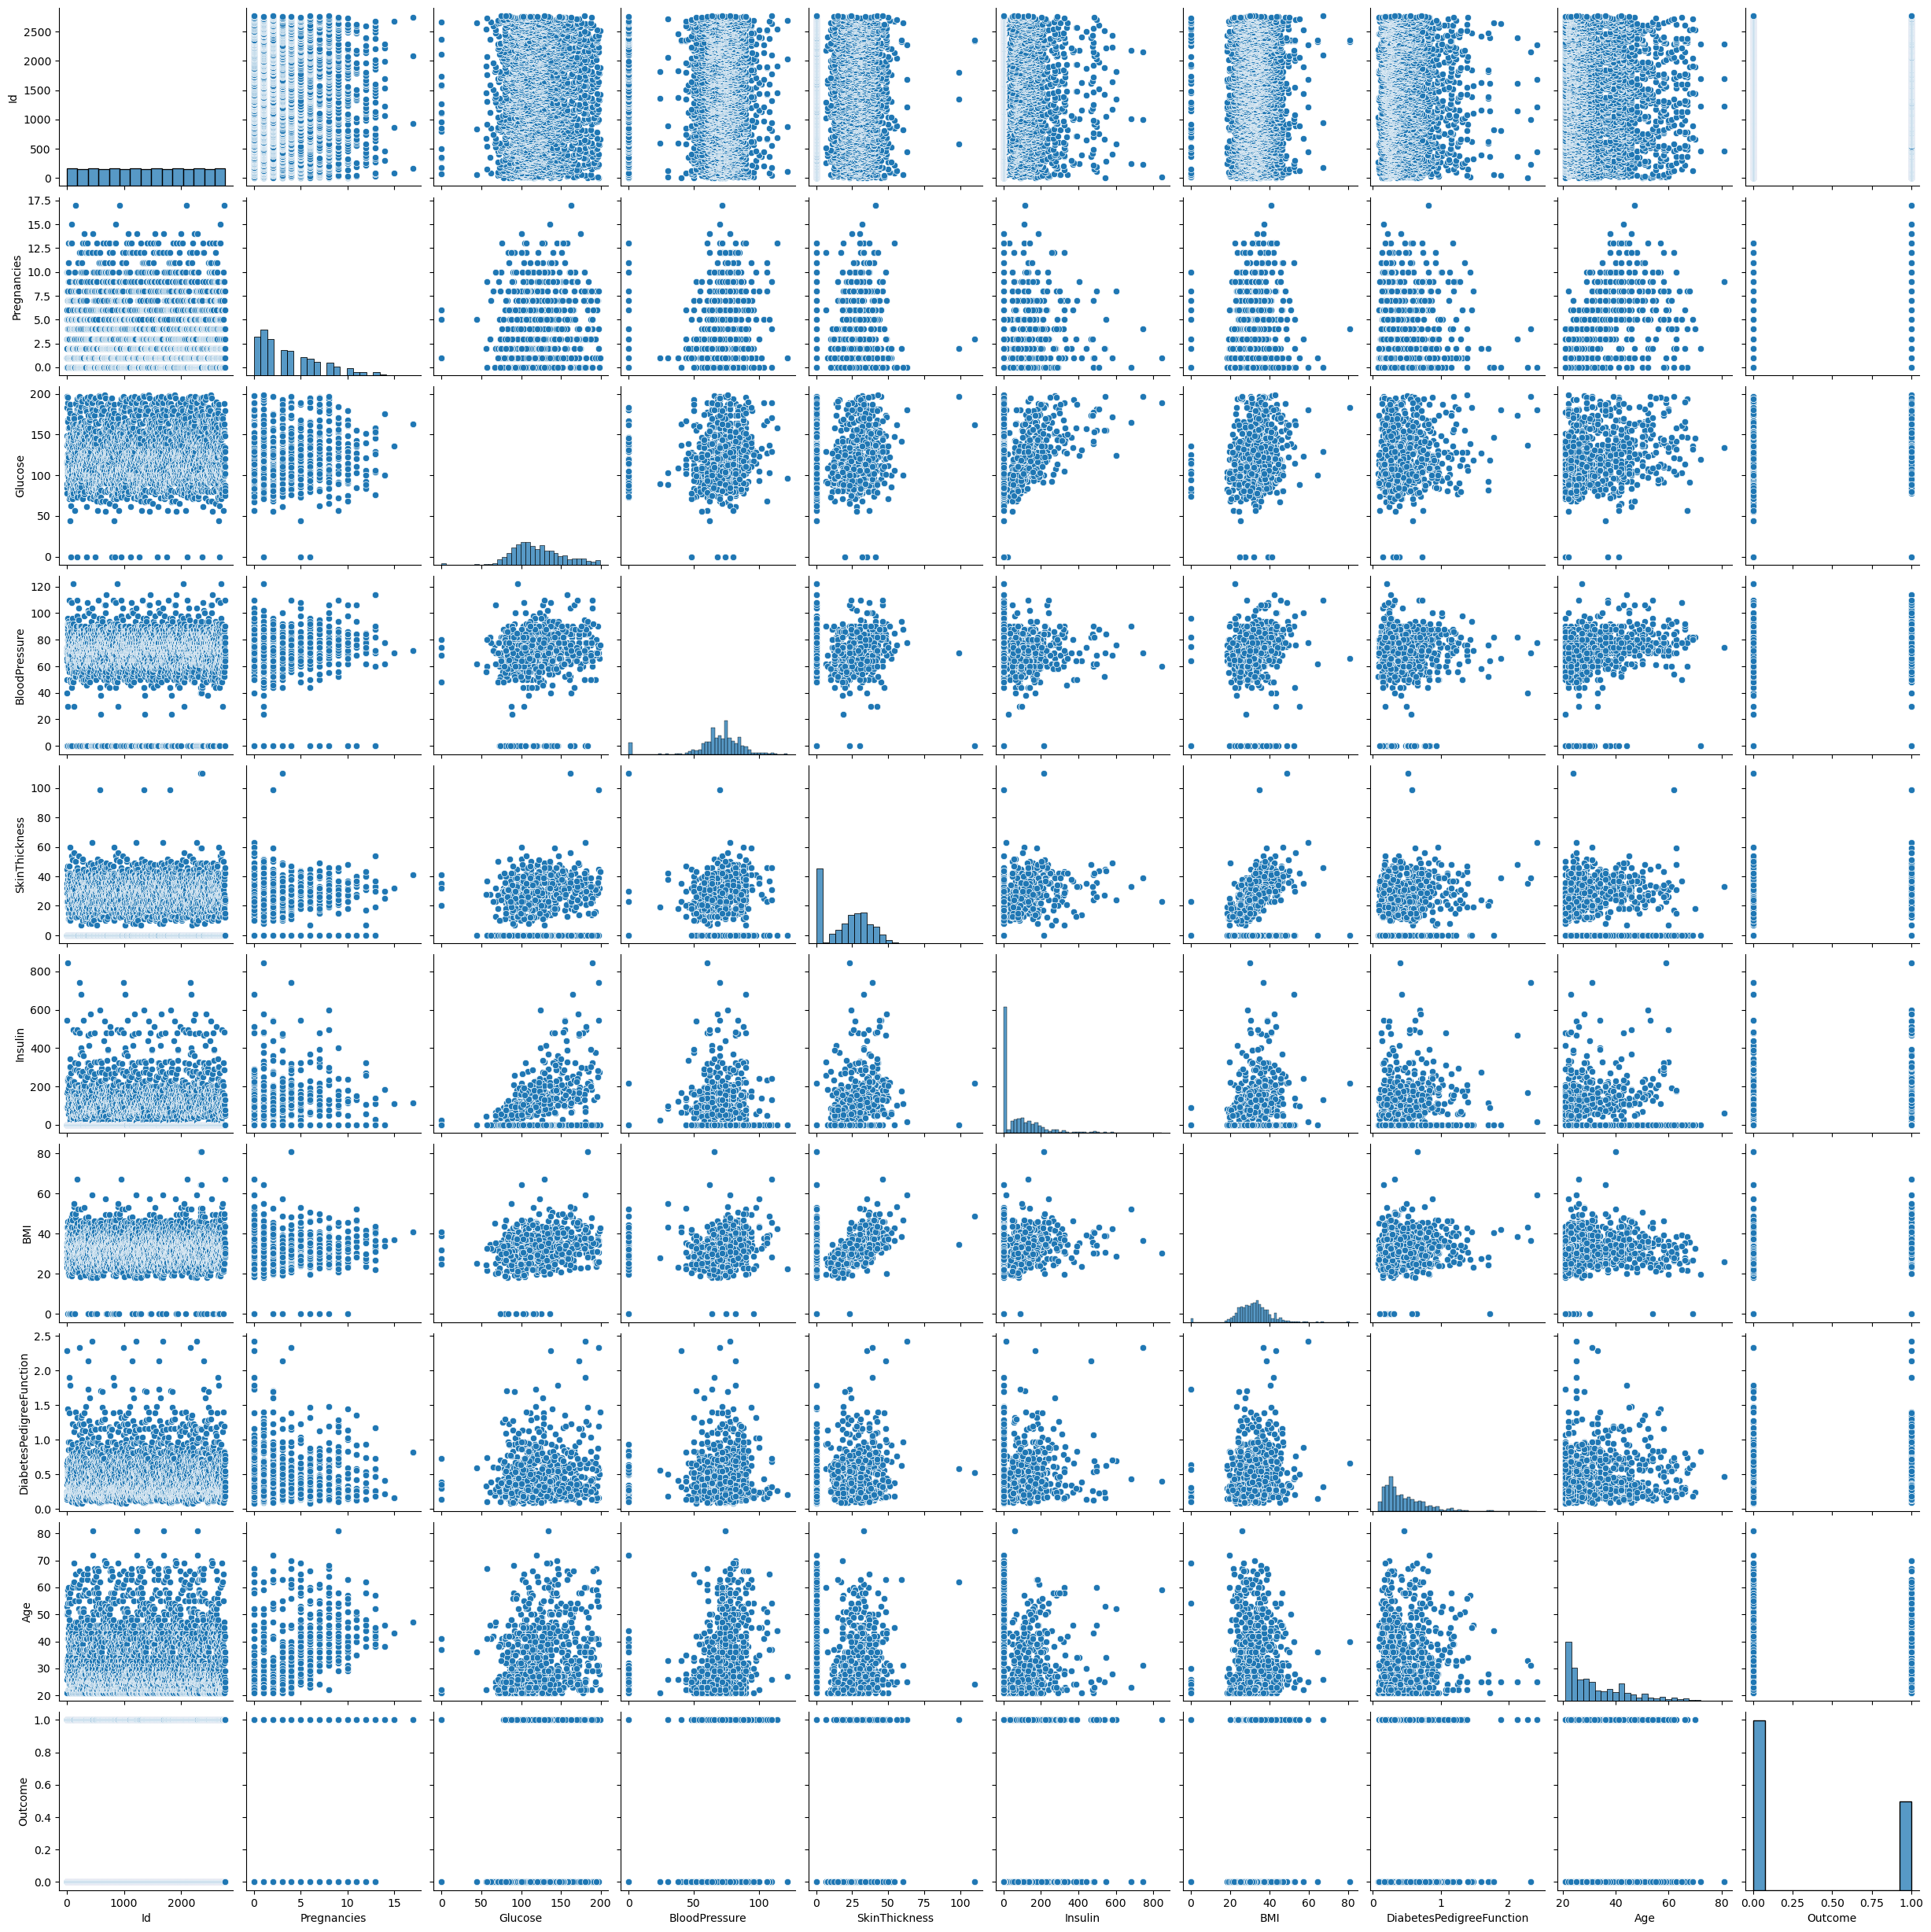

In [11]:
plt.figure(figsize = (30,15))
sns.pairplot(csv)

<Axes: >

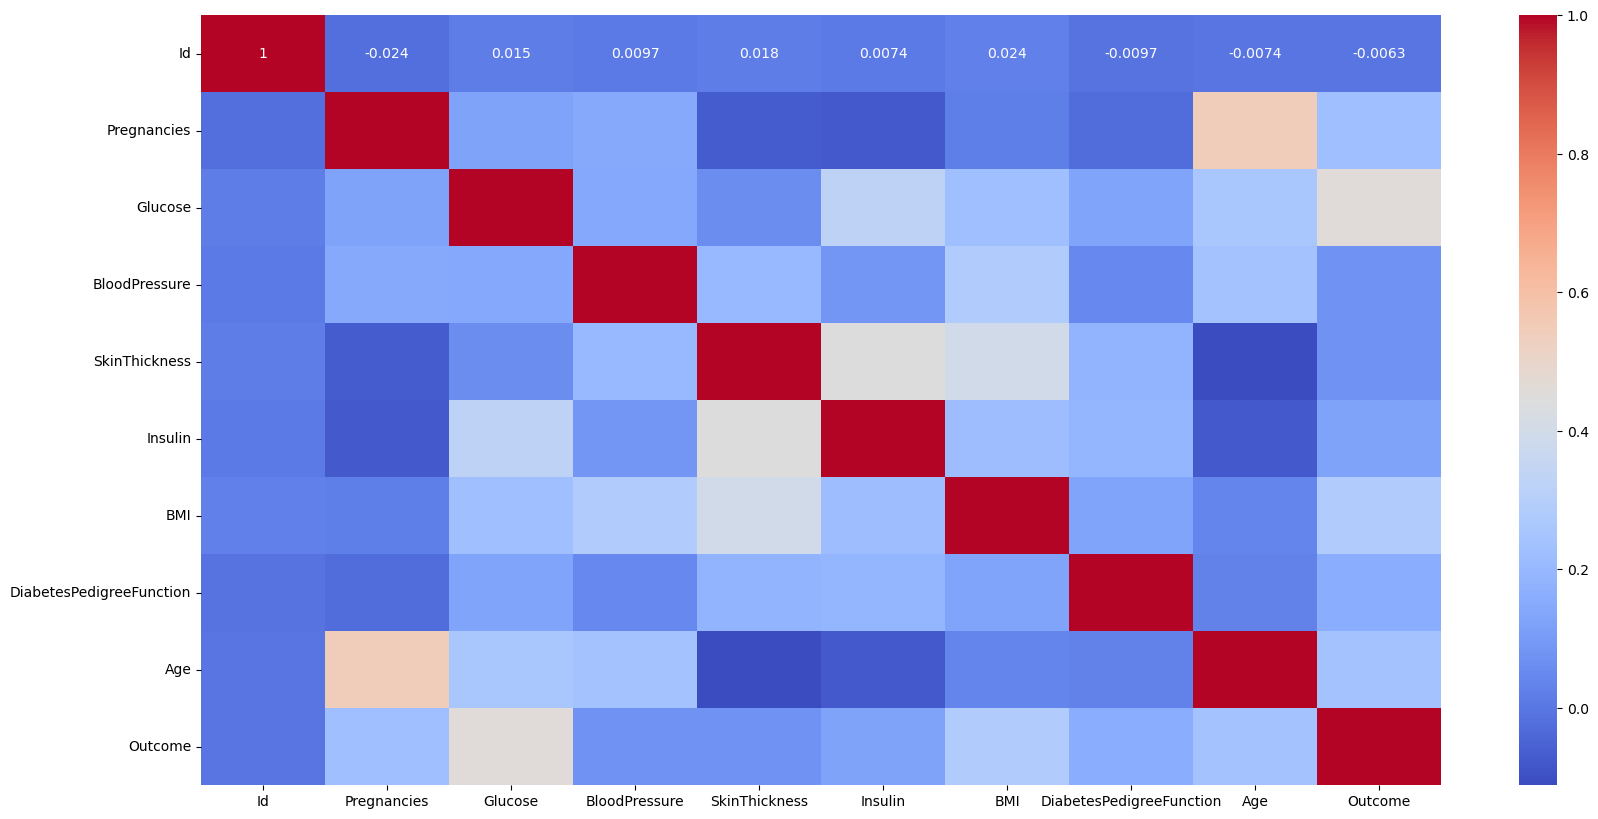

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(csv.corr(),annot=True,cmap='coolwarm')

In [13]:
value_count = csv['Outcome'].value_counts()
print(value_count)

Outcome
0    1816
1     952
Name: count, dtype: int64


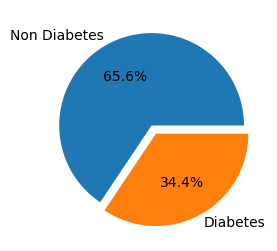

In [14]:
plt.figure(figsize = (3,3))

labels = ["Non Diabetes","Diabetes"]
explode = [0, 0.1]

plt.pie(csv.Outcome.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

Text(0.5, 1.0, 'Diagnosis Value Counts')

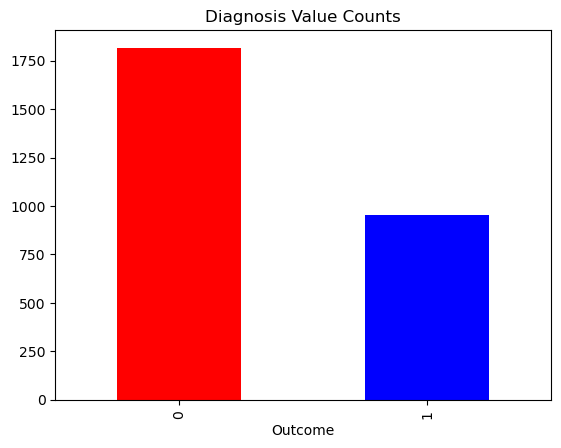

In [15]:
value_count.plot(kind='bar', color=['red', 'blue'])
plt.xlabel = ('Diabetes')
plt.ylabel = ('count')
plt.title('Diagnosis Value Counts')

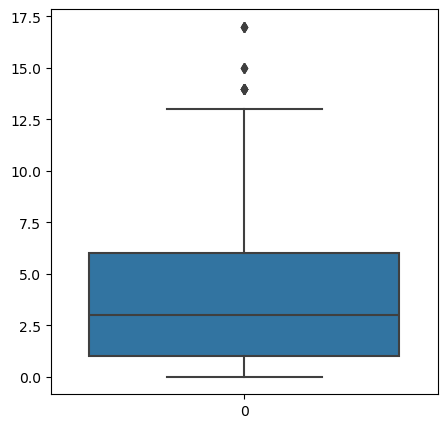

In [16]:
plt.figure(figsize = (5,5))
sns.boxplot(csv['Pregnancies'])
plt.show()

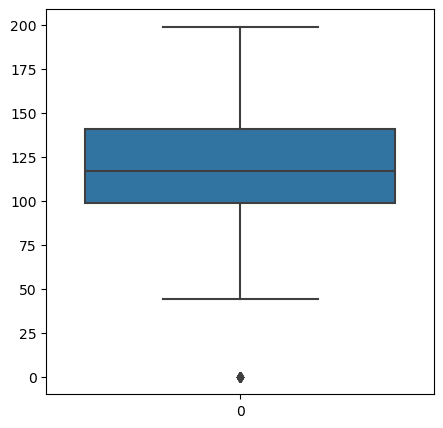

In [17]:
plt.figure(figsize = (5,5))
sns.boxplot(csv['Glucose'])
plt.show()

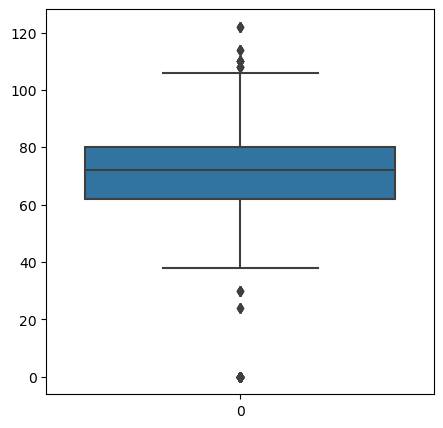

In [18]:
plt.figure(figsize = (5,5))
sns.boxplot(csv['BloodPressure'])
plt.show()

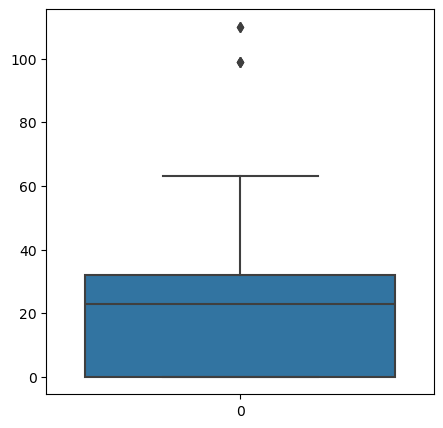

In [19]:
plt.figure(figsize = (5,5))
sns.boxplot(csv['SkinThickness'])
plt.show()

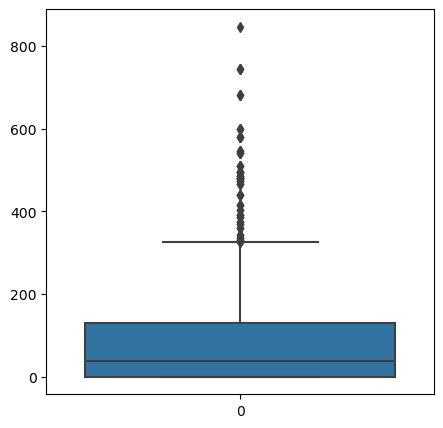

In [20]:
plt.figure(figsize = (5,5))
sns.boxplot(csv['Insulin'])
plt.show()

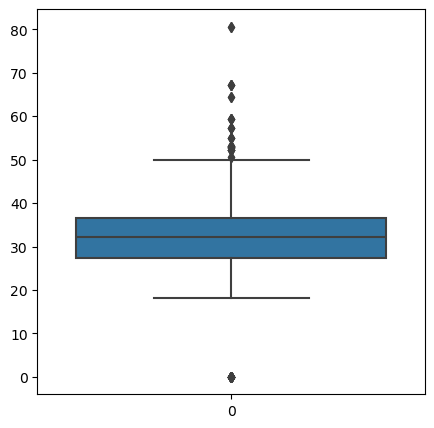

In [21]:
plt.figure(figsize = (5,5))
sns.boxplot(csv['BMI'])
plt.show()

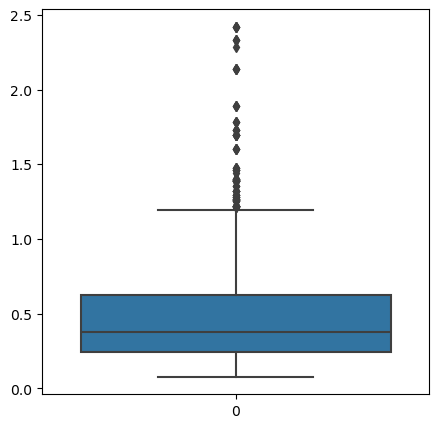

In [22]:
plt.figure(figsize = (5,5))
sns.boxplot(csv['DiabetesPedigreeFunction'])
plt.show()

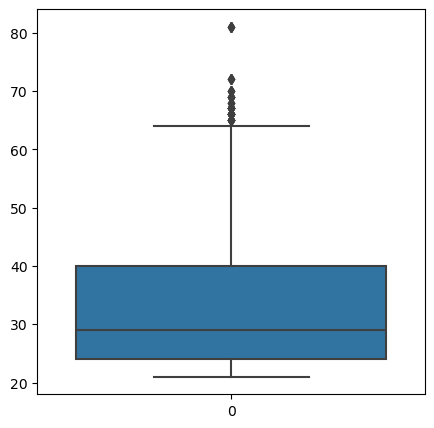

In [23]:
plt.figure(figsize = (5,5))
sns.boxplot(csv['Age'])
plt.show()

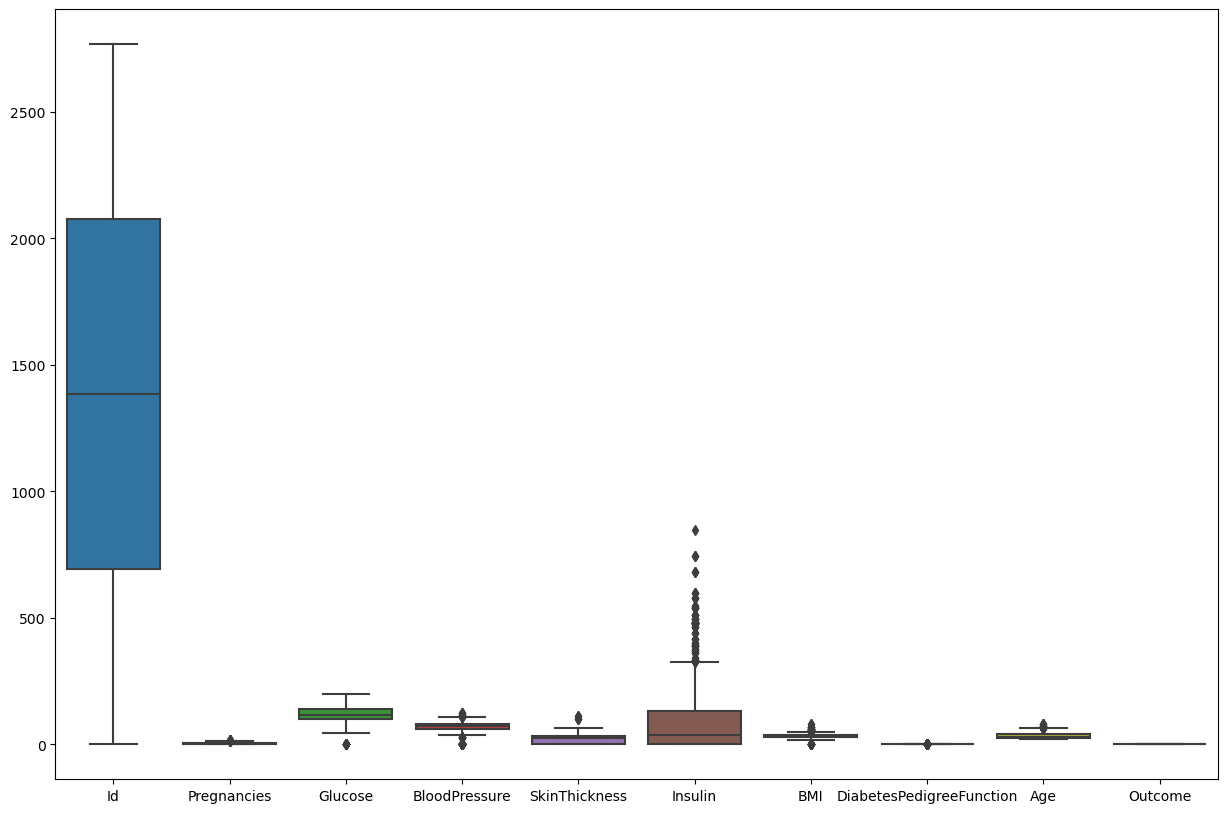

In [24]:
plt.figure(figsize = (15,10))
sns.boxplot(csv)
plt.show()

Data Insights:- 
1 Pregnancy Glucose:
.  Higher glucose levels indicate an increased risk in diabetes.
.High glucose during pregnancy (gestational diabetes) is a risk factor for the later development of type 2 diabetes .
2 BMI(Body Mass Index): 
Higher BMI is associated with an elevated risk of diabetes.
Excess body weight, especially abdominal obesity, is linked to insulin resistance and the onset of type 2 diabetes.  
3 Age
. Advancing age is generally linked to a higher likelihood of diabetes.
. The risk of diabetes generally increases with age ,with a higher prevalence in older populations. 
4 Diabetes Pedigree Function:
.  A higher Diabetes Pedigrees Function value suggests a stronger genetic predisposition to diabetes.
. A higher Diabetes pedigree Function score indicates a greater genetic predisposition to diabetes.
5 Insulin:-
Insulin resistance or insufficient insulin production is a hallmark f diabetes .


Transforming Data

In [25]:
csv['BMI'] = csv['BMI'].apply(lambda x: max(20, min(x, 90)))

In [26]:
csv.drop('Id', axis=1, inplace=True)

Chosing x (Independent Features) and y(Dependent)

In [27]:
x = csv.iloc[:2760,:-1]

In [28]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [29]:
y = csv.iloc[:2760,-1]

In [30]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Spliting data for training and testing

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.30,random_state= 42,stratify = y)

In [32]:
x_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
930,0,114,80,34,285,44.2,0.167,27
174,2,75,64,24,55,29.7,0.370,33
269,2,146,0,0,0,27.5,0.240,28
1537,8,112,72,0,0,23.6,0.840,58
377,1,87,60,37,75,37.2,0.509,22
1113,8,126,88,36,108,38.5,0.349,49
1458,8,107,80,0,0,24.6,0.856,34
1539,2,144,58,33,135,31.6,0.422,25
466,0,74,52,10,36,27.8,0.269,22
658,11,127,106,0,0,39.0,0.190,51


In [33]:
x_train.count()

Pregnancies                 1932
Glucose                     1932
BloodPressure               1932
SkinThickness               1932
Insulin                     1932
BMI                         1932
DiabetesPedigreeFunction    1932
Age                         1932
dtype: int64

In [34]:
y_train.value_counts()

Outcome
0    1268
1     664
Name: count, dtype: int64

Using Standard Scaler For Normalization

In [35]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Using LGBM Classifier

In [36]:
lgb = LGBMClassifier(verbose=-1,learning_rate = 0.01)
lgb.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.01, verbose=-1)

Model Evaluation Of Using 

In [37]:
y_pred = lgb.predict(x_train)

In [38]:
ypred = lgb.predict(x_test)

Using accuracy

In [39]:
accuracy = accuracy_score(y_test,ypred)
print('Accuracy Score Test\n',accuracy)

Accuracy Score Test
 0.8611111111111112


In [40]:
accuracy =accuracy_score(y_train,y_pred)
print('Accuracy Score Train\n',accuracy)

Accuracy Score Train
 0.9156314699792961


Using F1 score

In [41]:
F1_score  = f1_score(y_test,ypred)
print('F1 Score Test\n',F1_score)

F1 Score Test
 0.7766990291262136


In [42]:
F1_score  = f1_score(y_train,y_pred)
print('F1 Score Train\n',F1_score)

F1 Score Train
 0.8688656476267095


Using Confussion Matrix

In [43]:
cm = confusion_matrix(y_test,ypred)
print('Confussion Matrix Test \n',cm)

Confussion Matrix Test 
 [[513  30]
 [ 85 200]]


In [44]:
cm = confusion_matrix(y_train,y_pred)
print('Confussion Matrix Train\n',cm)

Confussion Matrix Train
 [[1229   39]
 [ 124  540]]


Classification Report of Model

In [45]:
report = classification_report(y_test,ypred)
print('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       543
           1       0.87      0.70      0.78       285

    accuracy                           0.86       828
   macro avg       0.86      0.82      0.84       828
weighted avg       0.86      0.86      0.86       828



In [46]:
report = classification_report(y_train,y_pred)
print('Classification Report Train\n',report)

Classification Report Train
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1268
           1       0.93      0.81      0.87       664

    accuracy                           0.92      1932
   macro avg       0.92      0.89      0.90      1932
weighted avg       0.92      0.92      0.91      1932



Checking Roc Curve

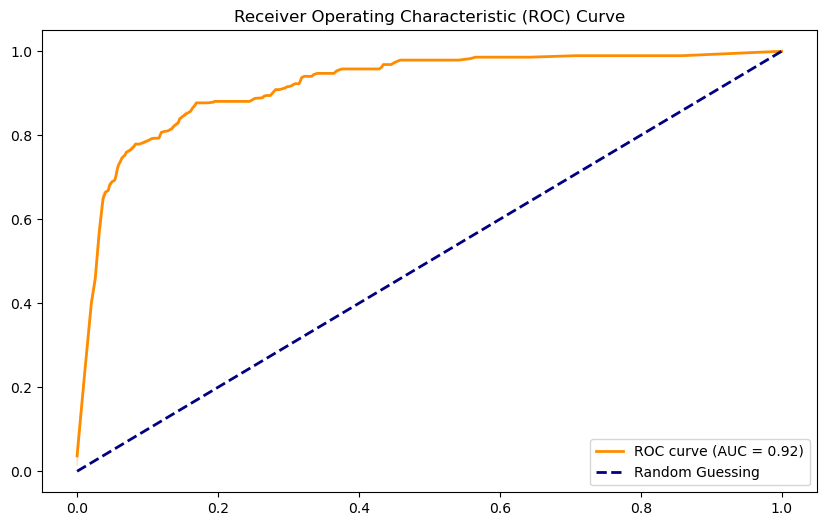

In [47]:
y_scores = lgb.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Checking Cross Validation Score

In [48]:
cv_scores = cross_val_score(lgb, x_train, y_train, cv=10, scoring='accuracy')
print('Cross Validation Of Accuracy\n',cv_scores)

Cross Validation Of Accuracy
 [0.84536082 0.88659794 0.87046632 0.82901554 0.84974093 0.84974093
 0.85492228 0.89119171 0.91709845 0.88082902]


In [49]:
cv_scores = cross_val_score(lgb, x_train, y_train, cv=10, scoring='f1')
print('Cross Validation OF F1 Score\n',cv_scores)

Cross Validation OF F1 Score
 [0.75409836 0.82258065 0.7826087  0.736      0.75630252 0.74782609
 0.75862069 0.83464567 0.87096774 0.80991736]


Testing Model On New Data

In [50]:
csv.tail(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2760,6,134,70,23,130,35.4,0.542,29,1
2761,2,87,0,23,0,28.9,0.773,25,0
2762,1,79,60,42,48,43.5,0.678,23,0
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1
2767,2,81,72,15,76,30.1,0.547,25,0


In [51]:
new_data = np.array([[0	,129	,110	,46	,130	,67.1	,0.319	,26		]])
sc.transform(new_data)
test = lgb.predict(new_data)
print('New Data\n',test)

New Data
 [1]


Checking Probablity of 0 and 1

In [52]:
probability = lgb.predict_proba(new_data)
print('Probability Of Comming 1 Or 0\n',probability)

Probability Of Comming 1 Or 0
 [[0.40727725 0.59272275]]


Using XGB Classifier 

In [53]:
xgb = XGBClassifier(learning_rate = 0.01)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model Evaluation Of XGB Classifier 

In [54]:
y_pred = xgb.predict(x_train) 

In [55]:
ypred = xgb.predict(x_test)

Using accuracy

In [56]:
accuracy = accuracy_score(y_test,ypred)
print ('Accuracy Score Test\n',accuracy)

Accuracy Score Test
 0.8393719806763285


In [57]:
accuracy = accuracy_score(y_train,y_pred)
print ('Accuracy Score Training\n',accuracy)

Accuracy Score Training
 0.9021739130434783


Using F1 Score

In [58]:
F1_score = f1_score(y_test,ypred)
print('F1 Score Test\n',F1_score)

F1 Score Test
 0.7280163599182004


In [59]:
F1_score = f1_score(y_train,y_pred)
print('F1 Score Training\n',F1_score)

F1 Score Training
 0.8421052631578947


Using Confusion Matrix

In [60]:
cm = confusion_matrix(y_test,ypred)
print('Confusion Matrix Test\n',cm)

Confusion Matrix Test
 [[517  26]
 [107 178]]


In [61]:
cm = confusion_matrix(y_train,y_pred)
print('Confusion Matrix Training\n',cm)

Confusion Matrix Training
 [[1239   29]
 [ 160  504]]


Using Classification Report

In [62]:
report = classification_report(y_test,ypred)
print ('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       543
           1       0.87      0.62      0.73       285

    accuracy                           0.84       828
   macro avg       0.85      0.79      0.81       828
weighted avg       0.84      0.84      0.83       828



In [63]:
report = classification_report(y_train,y_pred)
print ('Classification Report Training\n',report)

Classification Report Training
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1268
           1       0.95      0.76      0.84       664

    accuracy                           0.90      1932
   macro avg       0.92      0.87      0.89      1932
weighted avg       0.91      0.90      0.90      1932



Using Roc Curve

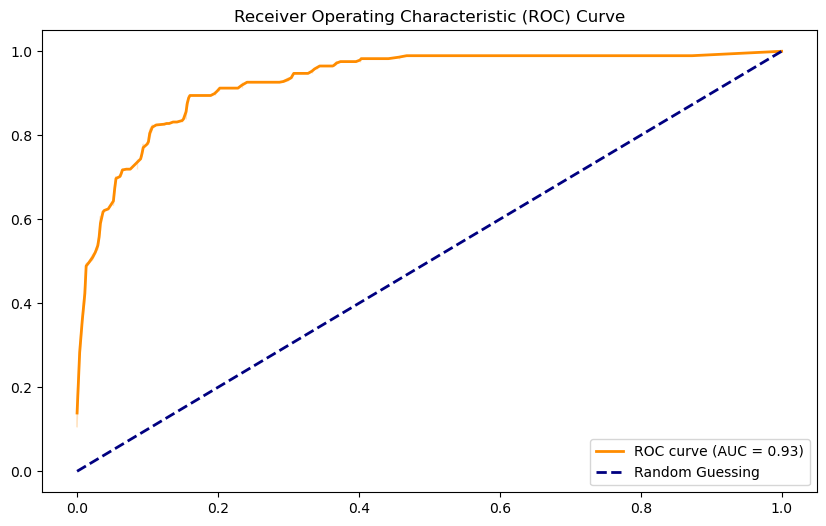

In [64]:
y_scores = xgb.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Using Cross Validation Score 

In [65]:
cv_score =cross_val_score(xgb,x_train,y_train,cv =5,scoring = 'accuracy' )
print ('Cross Validation Of Accuracy\n',cv_score)

Cross Validation Of Accuracy
 [0.8501292  0.86563307 0.84974093 0.84715026 0.88601036]


In [66]:
cv_score =cross_val_score(xgb,x_train,y_train,cv =5,scoring = 'f1' )
print ('Cross Validation Of F1 Score\n',cv_score)

Cross Validation Of F1 Score
 [0.75       0.78151261 0.74336283 0.75105485 0.81512605]


Testing Model On New Data

In [67]:
csv.tail(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2760,6,134,70,23,130,35.4,0.542,29,1
2761,2,87,0,23,0,28.9,0.773,25,0
2762,1,79,60,42,48,43.5,0.678,23,0
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1
2767,2,81,72,15,76,30.1,0.547,25,0


In [68]:
new_data= np.array([[6	,85	,78	,0	,0	,31.2	,0.382	,42]])
sc.fit_transform(new_data)
test = xgb.predict(new_data)
print('New Data\n',test)

New Data
 [0]


Checking Probablity Of 0 And 1 

In [69]:
probablity = xgb.predict_proba(new_data)
print('Probablity Of Comming 1 Or 0\n',probablity)

Probablity Of Comming 1 Or 0
 [[0.56362796 0.436372  ]]


Feature Importance Of XGB Model 

In [70]:
print('XGB Feature Importance\n',xgb.get_booster().get_score(importance_type='gain'))

XGB Feature Importance
 {'f0': 4.048136234283447, 'f1': 32.48386764526367, 'f2': 6.970996856689453, 'f3': 7.220986843109131, 'f4': 7.611724376678467, 'f5': 13.728913307189941, 'f6': 7.96168327331543, 'f7': 18.167837142944336}


Using Random Forest Classifier

In [71]:
rfc =RandomForestClassifier(max_depth = 40,n_estimators = 200,max_features = 2,min_samples_leaf  = 3,random_state =42)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=40, max_features=2, min_samples_leaf=3,
                       n_estimators=200, random_state=42)

Model Evaluation Of Random Forest Classifier

In [72]:
ypred = rfc.predict(x_test)

In [73]:
y_pred = rfc.predict(x_train)

Using Accuracy

In [74]:
accuracy = accuracy_score(y_test,ypred)
print ('Accuracy Score Test\n',accuracy)

Accuracy Score Test
 0.9480676328502415


In [75]:
accuracy = accuracy_score(y_train,y_pred)
print ('Accuracy Score Training\n',accuracy)

Accuracy Score Training
 0.9917184265010351


Using F1 Sore

In [76]:
F1_score = f1_score(y_test,ypred)
print('F1 Score Test\n',F1_score)

F1 Score Test
 0.9225225225225225


In [77]:
F1_score = f1_score(y_train,y_pred)
print('F1 Score Training\n',F1_score)

F1 Score Training
 0.9878971255673222


Using Confussion Matrix 

In [78]:
cm = confusion_matrix(y_test,ypred)
print('Confussion Matrix Test\n',cm)

Confussion Matrix Test
 [[529  14]
 [ 29 256]]


In [79]:
cm = confusion_matrix(y_train,y_pred)
print('Confussion Matrix Training\n',cm)

Confussion Matrix Training
 [[1263    5]
 [  11  653]]


Using Classification Report

In [80]:
report = classification_report(y_test,ypred)
print('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       543
           1       0.95      0.90      0.92       285

    accuracy                           0.95       828
   macro avg       0.95      0.94      0.94       828
weighted avg       0.95      0.95      0.95       828



In [81]:
report = classification_report(y_train,y_pred)
print('Classification Report Training\n',report)

Classification Report Training
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1268
           1       0.99      0.98      0.99       664

    accuracy                           0.99      1932
   macro avg       0.99      0.99      0.99      1932
weighted avg       0.99      0.99      0.99      1932



Using Roc Curve 

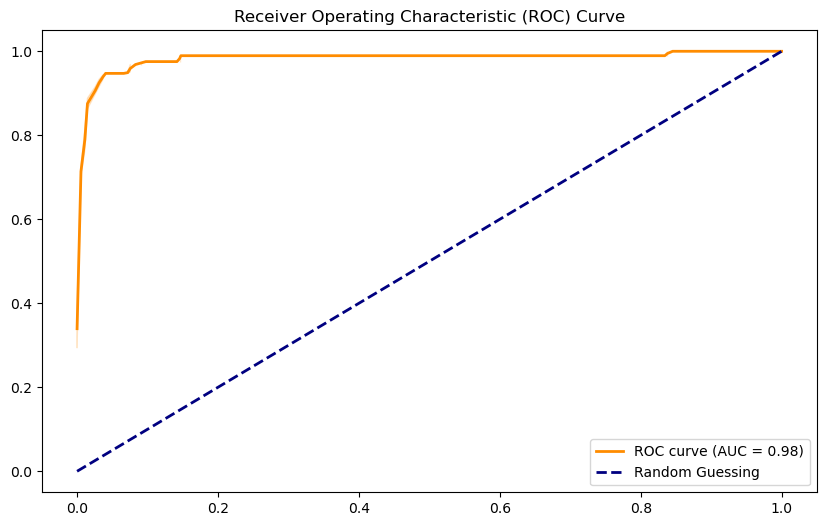

In [82]:
y_scores = rfc.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Using Cross Validation Score

In [83]:
cv_score =cross_val_score(rfc,x_train,y_train,cv =5,scoring = 'accuracy' )
print ('Cross Validation Of Accuracy\n',cv_score)

Cross Validation Of Accuracy
 [0.93281654 0.92248062 0.91968912 0.92746114 0.94041451]


In [84]:
cv_score =cross_val_score(rfc,x_train,y_train,cv =5,scoring = 'f1' )
print ('Cross Validation Of F1 Score\n',cv_score)

Cross Validation Of F1 Score
 [0.8968254  0.8828125  0.87843137 0.89230769 0.91187739]


In [85]:
csv.tail(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2760,6,134,70,23,130,35.4,0.542,29,1
2761,2,87,0,23,0,28.9,0.773,25,0
2762,1,79,60,42,48,43.5,0.678,23,0
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1
2767,2,81,72,15,76,30.1,0.547,25,0


Testing Model On New Data

In [86]:
new_data = np.array([[2	,81	,72	,15	,76	,30.1	,0.547	,25]])
sc.transform(new_data)
test = rfc.predict(new_data)
print('New Data\n',test)

New Data
 [1]


Checking Probablity Of 0 And 1 

In [87]:
probablity = rfc.predict_proba(new_data)
print('Probablity Of Comming 1 Or 0\n',probablity)

Probablity Of Comming 1 Or 0
 [[0.38369816 0.61630184]]


Feature Importance Of Random Forest Classifier

In [88]:
print('Feature Importance of Random Forest\n',rfc.feature_importances_)

Feature Importance of Random Forest
 [0.08178594 0.28141823 0.07704301 0.06176572 0.07269784 0.16815101
 0.11273155 0.14440669]


Comparing The Accuracy Of All Models

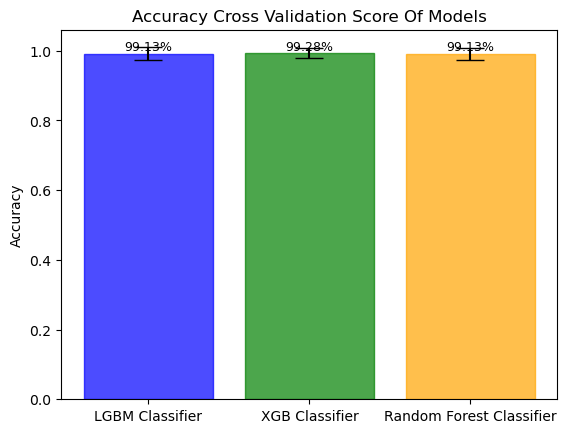

In [89]:
x, y = x,y
lgb_model = LGBMClassifier(verbose=-1)
xgb_model = XGBClassifier()
rfc_model = RandomForestClassifier()

classifiers = [lgb_model, xgb_model, rfc_model]
classifier_names = ['LGBM Classifier', 'XGB Classifier', 'Random Forest Classifier']
colors = ['blue', 'green', 'orange', 'red']
results = []

for classifier, name, color in zip(classifiers, classifier_names, colors):
    scores = cross_val_score(classifier, x, y, cv=10, scoring='accuracy')
    results.append((name, scores.mean(), scores.std(), color))

names, mean_scores, std_scores, bar_colors = zip(*results)
fig, ax = plt.subplots()

bars = ax.bar(names, mean_scores, yerr=std_scores, align='center', alpha=0.7, capsize=10)

# Adding accuracy percentages on top of each bar
for bar, acc_percentage in zip(bars, mean_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{acc_percentage:.2%}', 
            ha='center', va='bottom', color='black', fontsize=9)

for bar, color in zip(bars, bar_colors):
    bar.set_color(color)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Cross Validation Score Of Models')
plt.show()

Comparing F1 Score Of All Models 

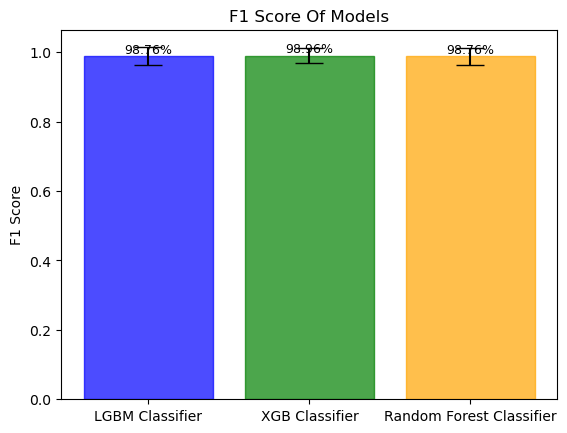

In [90]:
x, y = x,y
lgb_model = LGBMClassifier(verbose = -1)
xgb_model = XGBClassifier()
rfc_model = RandomForestClassifier()

classifiers = [lgb_model, xgb_model, rfc_model]
classifier_names = ['LGBM Classifier', 'XGB Classifier', 'Random Forest Classifier']
colors = ['blue', 'green', 'orange', 'red']
results = []

for classifier, name, color in zip(classifiers, classifier_names, colors):
    scores = cross_val_score(classifier, x, y, cv=10, scoring='f1')
    results.append((name, scores.mean(), scores.std(), color))

names, mean_scores, std_scores, bar_colors = zip(*results)
fig, ax = plt.subplots()

bars = ax.bar(names, mean_scores, yerr=std_scores, align='center', alpha=0.7, capsize=10)

# Adding accuracy percentages on top of each bar
for bar, acc_percentage in zip(bars, mean_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{acc_percentage:.2%}', 
            ha='center', va='bottom', color='black', fontsize=9)

for bar, color in zip(bars, bar_colors):
    bar.set_color(color)

ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Of Models')
plt.show()

Comparing Confusion Matrix Of All Models 

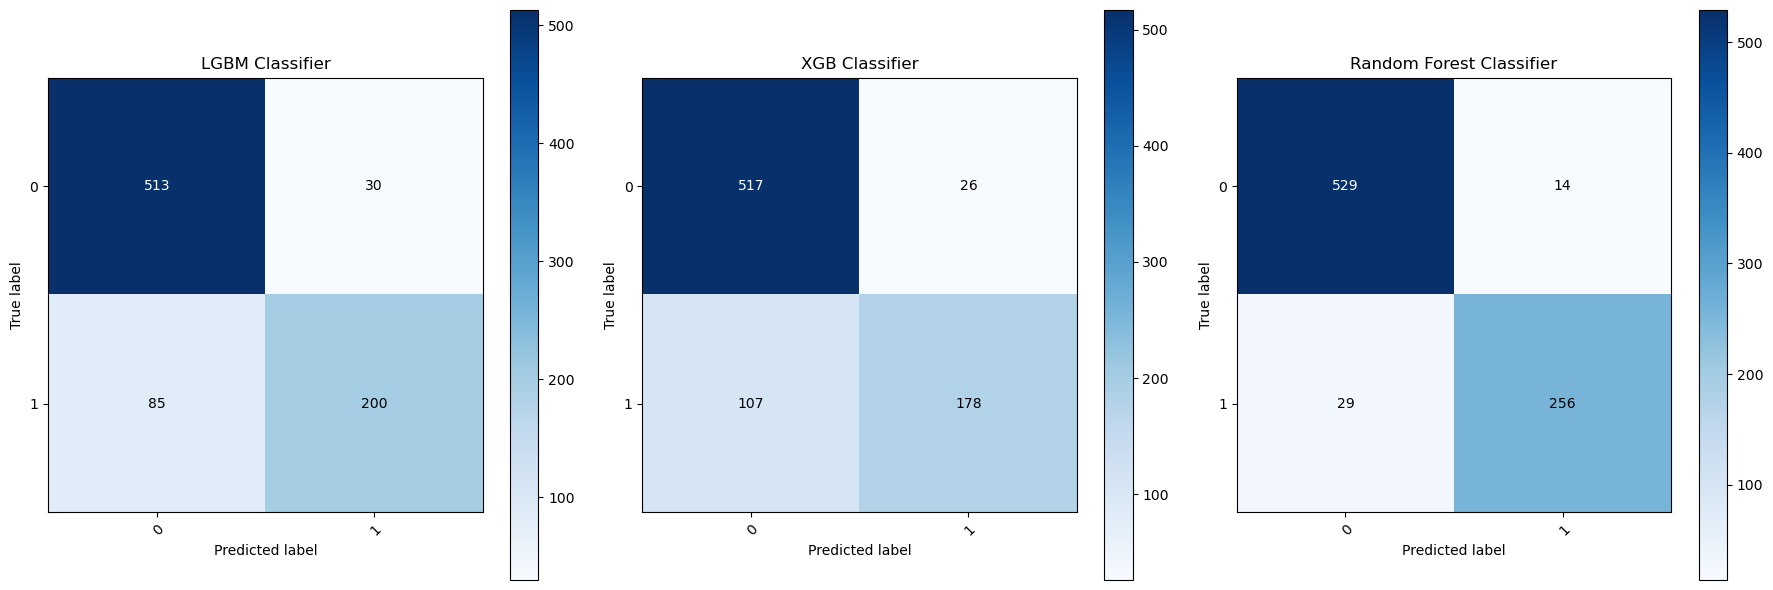

In [91]:

lgb_ypred = lgb.predict(x_test)
xgb_ypred = xgb.predict(x_test)
rfc_ypred = rfc.predict(x_test)

# Combine all predictions for unique labels
ypreds = [lgb_ypred, xgb_ypred, rfc_ypred]
all_labels = np.concatenate(ypreds)
class_names = unique_labels(all_labels)

# Compute confusion matrices
conf_matrix_lgb = confusion_matrix(y_test, lgb_ypred, labels=class_names)
conf_matrix_xgb = confusion_matrix(y_test, xgb_ypred, labels=class_names)
conf_matrix_rfc = confusion_matrix(y_test, rfc_ypred, labels=class_names)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, conf_matrix, title in zip(axes, [conf_matrix_lgb, conf_matrix_xgb, conf_matrix_rfc],
                                  ['LGBM Classifier', 'XGB Classifier', 'Random Forest Classifier']):
    im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Show all ticks
    ax.set(xticks=np.arange(conf_matrix.shape[1]),
           yticks=np.arange(conf_matrix.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, format(conf_matrix[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_matrix[i, j] > thresh else "black")

fig.tight_layout()
plt.show()


Comparing Roc Curve Of All Models

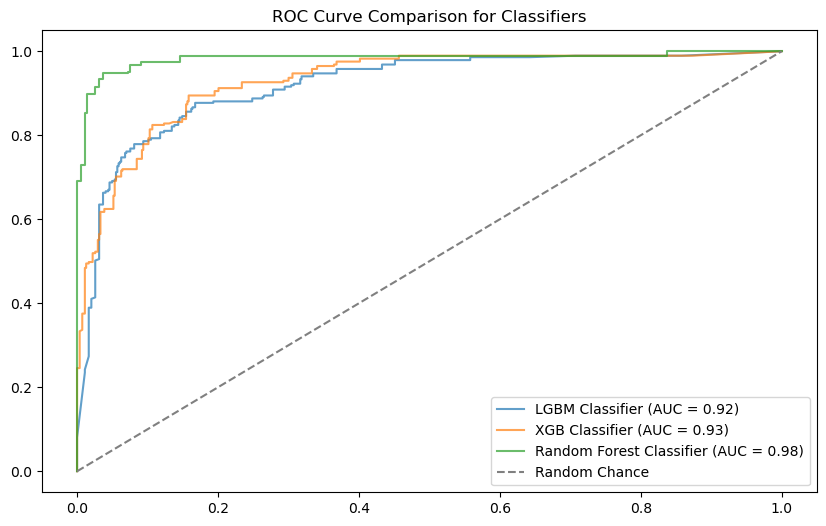

In [92]:
lgb_probs = lgb.predict_proba(x_test)[:, 1]
xgb_probs = xgb.predict_proba(x_test)[:, 1]
rfc_probs = rfc.predict_proba(x_test)[:, 1]

lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

lgb_auc = auc(lgb_fpr, lgb_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
rfc_auc = auc(rfc_fpr, rfc_tpr)


plt.figure(figsize=(10, 6))

# Adjust alpha for transparency
plt.plot(lgb_fpr, lgb_tpr, label=f'LGBM Classifier (AUC = {lgb_auc:.2f})', alpha=0.7)
plt.plot(xgb_fpr, xgb_tpr, label=f'XGB Classifier (AUC = {xgb_auc:.2f})', alpha=0.7)
plt.plot(rfc_fpr, rfc_tpr, label=f'Random Forest Classifier (AUC = {rfc_auc:.2f})', alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

plt.title('ROC Curve Comparison for Classifiers')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Checking Model Accuracy With Smote

In [93]:
csv = pd.read_csv(r"C:\Users\Admin\Downloads\Healthcare-Diabetes.csv")

In [94]:
csv.drop('Id', axis=1, inplace=True)

In [95]:
x=  csv.iloc[:2900,:-1]

In [96]:
y = csv.iloc[:2900,-1]

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
smote = SMOTE(random_state=42)
x_resampled ,y_resampled = smote.fit_resample(x,y)

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state = 42)

In [100]:
x_train.shape

(2905, 8)

In [101]:
y_train.shape

(2905,)

Visualization Of Solving Imbalance Data

In [102]:
print(x_train.shape)
n = (y_train.value_counts())
print(n)

(2905, 8)
Outcome
1    1466
0    1439
Name: count, dtype: int64


Text(0.5, 1.0, 'Outcome Value Counts')

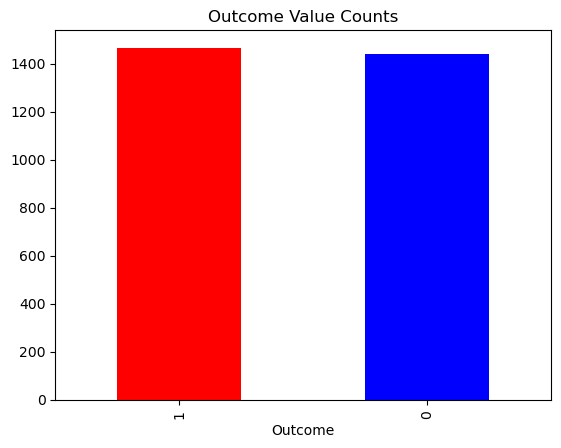

In [103]:
n.plot(kind='bar', color=['red', 'blue'])
plt.xlabel = ('diagnosis')
plt.ylabel = ('count')
plt.title('Outcome Value Counts')

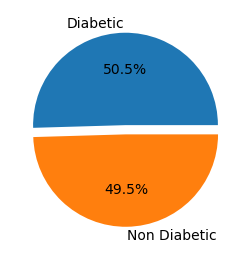

In [104]:
plt.figure(figsize = (3,3))

labels = ["Diabetic","Non Diabetic"]
explode = [0, 0.1]

plt.pie(y_train.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

Using LGBM Classifier

In [105]:
lgb = LGBMClassifier(verbose=-1,learning_raye =0.01)#(max_depth = 25,random_state=42,num_leaves = 20,learning_rate = 0.01,n_estimators = 250)
lgb.fit(x_train, y_train)

LGBMClassifier(learning_raye=0.01, verbose=-1)

Model Evaluation Of LGBM Classifier

In [106]:
y_pred= lgb.predict(x_train)
ypred= lgb.predict(x_test)

In [107]:
print('Test Accuracy', accuracy_score(y_test,ypred))
print('Test F1 score',f1_score(y_test,ypred))
print('Test Confusion Matrix\n',confusion_matrix(y_test,ypred))

Test Accuracy 0.9917469050894085
Test F1 score 0.991404011461318
Test Confusion Matrix
 [[375   2]
 [  4 346]]


In [108]:
print('Training Accuracy',accuracy_score(y_train,y_pred))
print( 'Training F1 score',f1_score(y_train,y_pred))
print('Training Confusion Matrix\n', confusion_matrix(y_train, y_pred))

Training Accuracy 1.0
Training F1 score 1.0
Training Confusion Matrix
 [[1439    0]
 [   0 1466]]


In [109]:
report = classification_report(y_test,ypred)
print('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       377
           1       0.99      0.99      0.99       350

    accuracy                           0.99       727
   macro avg       0.99      0.99      0.99       727
weighted avg       0.99      0.99      0.99       727



In [110]:
report = classification_report(y_train,y_pred)
print('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1439
           1       1.00      1.00      1.00      1466

    accuracy                           1.00      2905
   macro avg       1.00      1.00      1.00      2905
weighted avg       1.00      1.00      1.00      2905



Using Roc Curve 

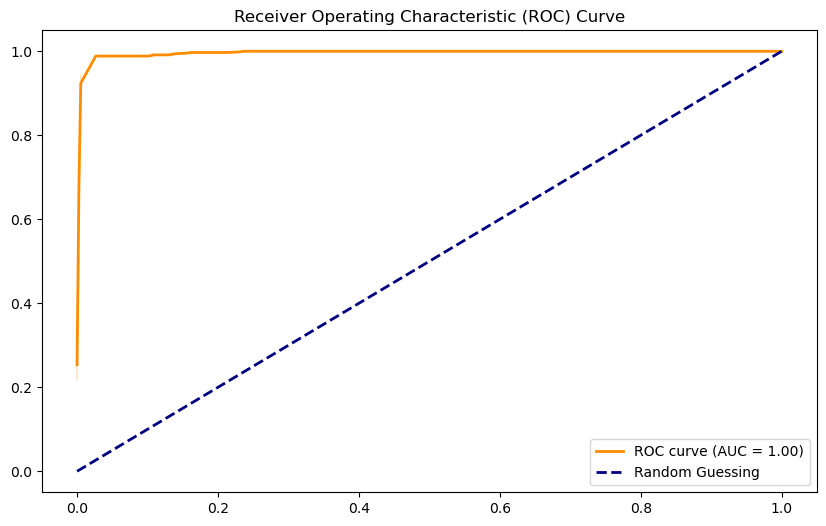

In [111]:
y_scores = lgb.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Using Cross Validation Score 

In [112]:
cv_score =cross_val_score(lgb,x_train,y_train,cv =5,scoring = 'accuracy' )
print ('Cross Validation Of F1 Score\n',cv_score)

Cross Validation Of F1 Score
 [0.98623064 0.98623064 0.9827883  0.97762478 0.97762478]


In [113]:
cv_score =cross_val_score(lgb,x_train,y_train,cv =5,scoring = 'f1' )
print ('Cross Validation Of F1 Score\n',cv_score)

Cross Validation Of F1 Score
 [0.98648649 0.98639456 0.98305085 0.97792869 0.97777778]


In [114]:
csv.tail(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2760,6,134,70,23,130,35.4,0.542,29,1
2761,2,87,0,23,0,28.9,0.773,25,0
2762,1,79,60,42,48,43.5,0.678,23,0
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1
2767,2,81,72,15,76,30.1,0.547,25,0


Testing Model On New Data

In [115]:
new_data = np.array([[6	,85	,78	,0	,0	,31.2	,0.382	,42]])
sc = StandardScaler ()
sc.fit_transform(new_data)
test = lgb.predict(new_data)
print('New Data\n',test)

New Data
 [0]


In [116]:
probablity = lgb.predict_proba(new_data)
print('Probablity Of Comming 1 Or 0\n',probablity)

Probablity Of Comming 1 Or 0
 [[0.97767376 0.02232624]]


Using XGB Classifier

In [117]:
xgb = XGBClassifier(learning_rate = 0.01,random_state = 42,n_estimators = 200,min_child_weight = 3,sub_sample=0.8,colsample_bytree =0.8,gamma = 0.2,max_depth = 15, )
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model Evaluation Of XGB Classifier

In [118]:
y_pred= xgb.predict(x_train)
ypred= xgb.predict(x_test)

In [119]:
print('Test Accuracy', accuracy_score(y_test,ypred))
print('Test F1 score',f1_score(y_test,ypred))
print('Test Confusion Matrix\n',confusion_matrix(y_test,ypred))

Test Accuracy 0.9628610729023384
Test F1 score 0.9619181946403386
Test Confusion Matrix
 [[359  18]
 [  9 341]]


In [120]:
print('Training Accuracy',accuracy_score(y_train,y_pred))
print( 'Training F1 score',f1_score(y_train,y_pred))
print('Training Confusion Matrix\n', confusion_matrix(y_train, y_pred))

Training Accuracy 0.9896729776247849
Training F1 score 0.9897959183673469
Training Confusion Matrix
 [[1420   19]
 [  11 1455]]


In [121]:
report = classification_report(y_test,ypred)
print('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       377
           1       0.95      0.97      0.96       350

    accuracy                           0.96       727
   macro avg       0.96      0.96      0.96       727
weighted avg       0.96      0.96      0.96       727



In [122]:
report = classification_report(y_train,y_pred)
print('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1439
           1       0.99      0.99      0.99      1466

    accuracy                           0.99      2905
   macro avg       0.99      0.99      0.99      2905
weighted avg       0.99      0.99      0.99      2905



Using Roc Curve 

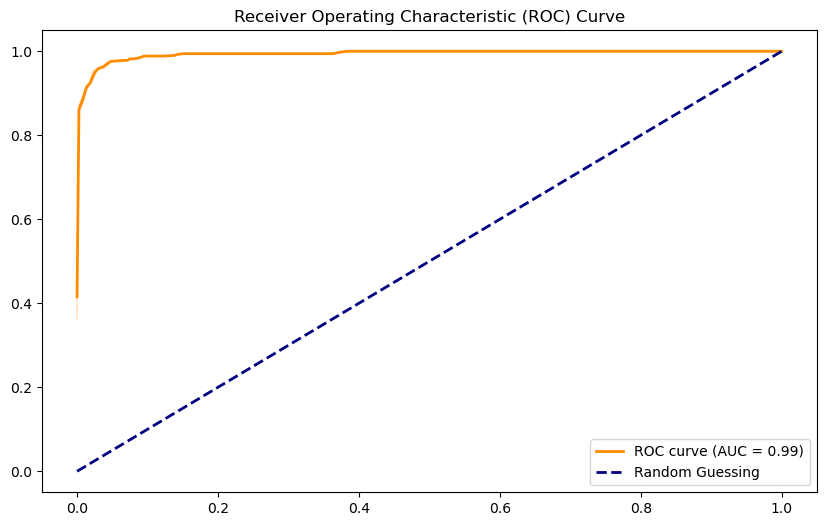

In [123]:
y_scores = xgb.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Using Cross Validation Score 

In [124]:
cv_score =cross_val_score(xgb,x_train,y_train,cv =5,scoring = 'accuracy' )
print ('Cross Validation Of F1 Score\n',cv_score)

Cross Validation Of F1 Score
 [0.96385542 0.94836489 0.96557659 0.94148021 0.94492255]


In [125]:
cv_score =cross_val_score(xgb,x_train,y_train,cv =5,scoring = 'f1' )
print ('Cross Validation Of F1 Score\n',cv_score)

Cross Validation Of F1 Score
 [0.96528926 0.94949495 0.96632997 0.94197952 0.94648829]


Testing Model On New Data

In [126]:
new_data = np.array([[1	,79	,60	,42	,48	,43.5	,0.678	,23	]])
sc.fit_transform(new_data)
test = xgb.predict(new_data)
print('New Data\n',test)

New Data
 [0]


In [127]:
probablity = xgb.predict_proba(new_data)
print('Probablity Of Comming 1 Or 0\n',probablity)

Probablity Of Comming 1 Or 0
 [[0.79010516 0.20989485]]


Using Random Forest Classifier

In [128]:
rfc =RandomForestClassifier(max_depth = 15,n_estimators = 80,max_features = 3,min_samples_leaf  = 1,random_state =42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, max_features=3, n_estimators=80,
                       random_state=42)

Model Evaluation Of Random Forest Classifier

In [129]:
y_pred= rfc.predict(x_train)
ypred= rfc.predict(x_test)

In [130]:
print('Test Accuracy', accuracy_score(y_test,ypred))
print('Test F1 score',f1_score(y_test,ypred))
print('Test Confusion Matrix\n',confusion_matrix(y_test,ypred))

Test Accuracy 0.9876203576341128
Test F1 score 0.9870503597122302
Test Confusion Matrix
 [[375   2]
 [  7 343]]


In [131]:
print('Training Accuracy',accuracy_score(y_train,y_pred))
print( 'Training F1 score',f1_score(y_train,y_pred))
print('Training Confusion Matrix\n', confusion_matrix(y_train, y_pred))

Training Accuracy 1.0
Training F1 score 1.0
Training Confusion Matrix
 [[1439    0]
 [   0 1466]]


In [132]:
report = classification_report(y_test,ypred)
print('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       377
           1       0.99      0.98      0.99       350

    accuracy                           0.99       727
   macro avg       0.99      0.99      0.99       727
weighted avg       0.99      0.99      0.99       727



In [133]:
report = classification_report(y_train,y_pred)
print('Classification Report Test\n',report)

Classification Report Test
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1439
           1       1.00      1.00      1.00      1466

    accuracy                           1.00      2905
   macro avg       1.00      1.00      1.00      2905
weighted avg       1.00      1.00      1.00      2905



Using Roc Curve 

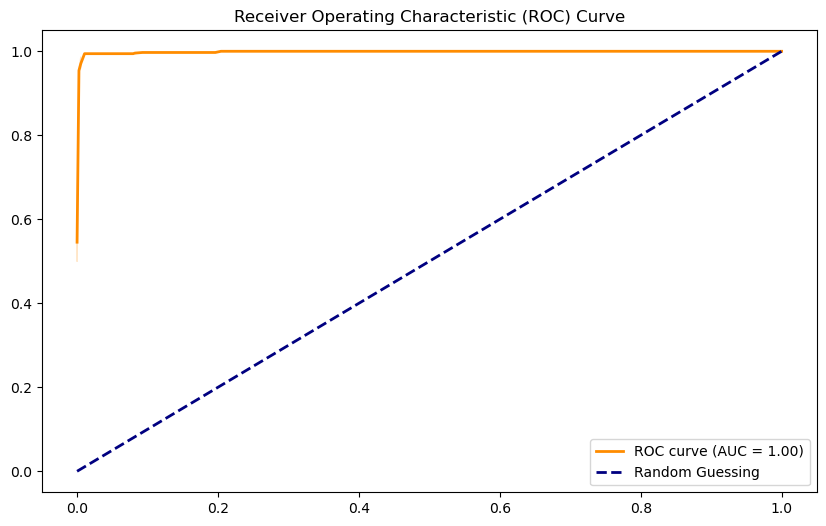

In [134]:
y_scores = rfc.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Using Cross Validation Of Model

In [135]:
cv_score =cross_val_score(rfc,x_train,y_train,cv =5,scoring = 'accuracy' )
print ('Cross Validation Of F1 Score\n',cv_score)

Cross Validation Of F1 Score
 [0.9827883  0.98623064 0.9827883  0.97934596 0.98106713]


In [136]:
cv_score =cross_val_score(rfc,x_train,y_train,cv =5,scoring = 'f1' )
print ('Cross Validation Of F1 Score\n',cv_score)

Cross Validation Of F1 Score
 [0.98305085 0.98639456 0.98305085 0.97959184 0.98126065]


Testing Model On New Data

In [137]:
new_data = np.array([[2	,81	,72	,15	,76	,30.1	,0.547	,25]])
sc.fit_transform(new_data)
test = rfc.predict(new_data)
print('New Data\n',test)

New Data
 [0]


In [138]:
probablity = rfc.predict_proba(new_data)
print('Probablity Of Comming 1 Or 0\n',probablity)

Probablity Of Comming 1 Or 0
 [[1. 0.]]


Checking Accuracy Of All Models

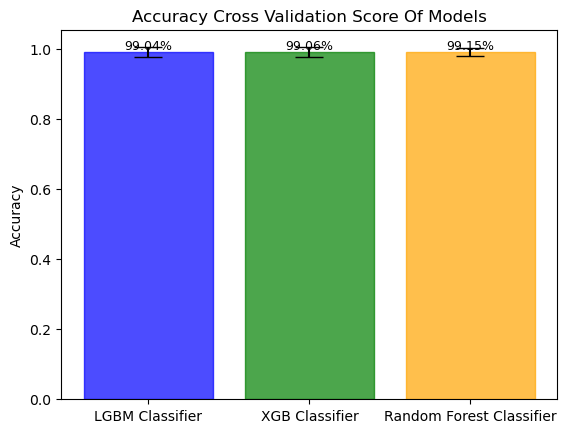

In [139]:
x, y = x_resampled ,y_resampled
lgb_model = LGBMClassifier(verbose=-1)
xgb_model = XGBClassifier()
rfc_model = RandomForestClassifier()

classifiers = [lgb_model, xgb_model, rfc_model]
classifier_names = ['LGBM Classifier', 'XGB Classifier', 'Random Forest Classifier']
colors = ['blue', 'green', 'orange', 'red']
results = []

for classifier, name, color in zip(classifiers, classifier_names, colors):
    scores = cross_val_score(classifier, x, y, cv=10, scoring='accuracy')
    results.append((name, scores.mean(), scores.std(), color))

names, mean_scores, std_scores, bar_colors = zip(*results)
fig, ax = plt.subplots()

bars = ax.bar(names, mean_scores, yerr=std_scores, align='center', alpha=0.7, capsize=10)

# Adding accuracy percentages on top of each bar
for bar, acc_percentage in zip(bars, mean_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{acc_percentage:.2%}', 
            ha='center', va='bottom', color='black', fontsize=9)

for bar, color in zip(bars, bar_colors):
    bar.set_color(color)

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Cross Validation Score Of Models')
plt.show()

Checking F1 Score Of All Models

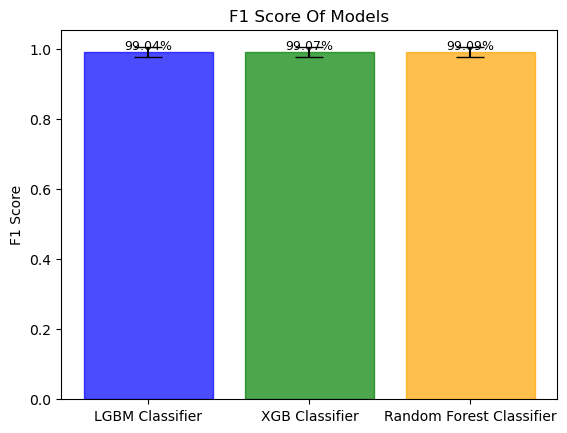

In [140]:
x, y = x_resampled ,y_resampled
lgb_model = LGBMClassifier(verbose = -1)
xgb_model = XGBClassifier()
rfc_model = RandomForestClassifier()

classifiers = [lgb_model, xgb_model, rfc_model]
classifier_names = ['LGBM Classifier', 'XGB Classifier', 'Random Forest Classifier']
colors = ['blue', 'green', 'orange', 'red']
results = []

for classifier, name, color in zip(classifiers, classifier_names, colors):
    scores = cross_val_score(classifier, x, y, cv=10, scoring='f1')
    results.append((name, scores.mean(), scores.std(), color))

names, mean_scores, std_scores, bar_colors = zip(*results)
fig, ax = plt.subplots()

bars = ax.bar(names, mean_scores, yerr=std_scores, align='center', alpha=0.7, capsize=10)

# Adding accuracy percentages on top of each bar
for bar, acc_percentage in zip(bars, mean_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{acc_percentage:.2%}', 
            ha='center', va='bottom', color='black', fontsize=9)

for bar, color in zip(bars, bar_colors):
    bar.set_color(color)

ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Of Models')
plt.show()

Checking Confussion Matrix Of All Models

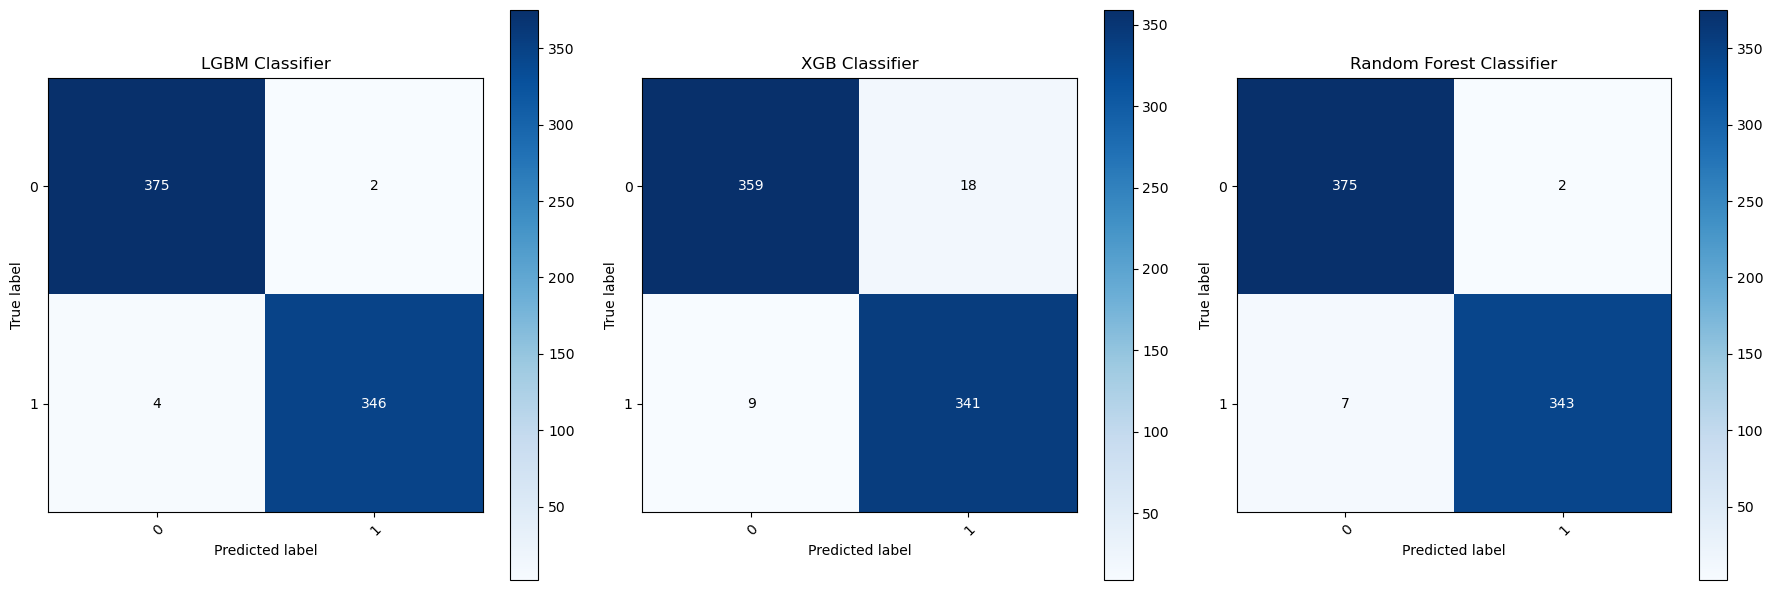

In [141]:

lgb_ypred = lgb.predict(x_test)
xgb_ypred = xgb.predict(x_test)
rfc_ypred = rfc.predict(x_test)

# Combine all predictions for unique labels
ypreds = [lgb_ypred, xgb_ypred, rfc_ypred]
all_labels = np.concatenate(ypreds)
class_names = unique_labels(all_labels)

# Compute confusion matrices
conf_matrix_lgb = confusion_matrix(y_test, lgb_ypred, labels=class_names)
conf_matrix_xgb = confusion_matrix(y_test, xgb_ypred, labels=class_names)
conf_matrix_rfc = confusion_matrix(y_test, rfc_ypred, labels=class_names)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, conf_matrix, title in zip(axes, [conf_matrix_lgb, conf_matrix_xgb, conf_matrix_rfc],
                                  ['LGBM Classifier', 'XGB Classifier', 'Random Forest Classifier']):
    im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Show all ticks
    ax.set(xticks=np.arange(conf_matrix.shape[1]),
           yticks=np.arange(conf_matrix.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, format(conf_matrix[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_matrix[i, j] > thresh else "black")

fig.tight_layout()
plt.show()


Checking Roc Curve Of All Models 

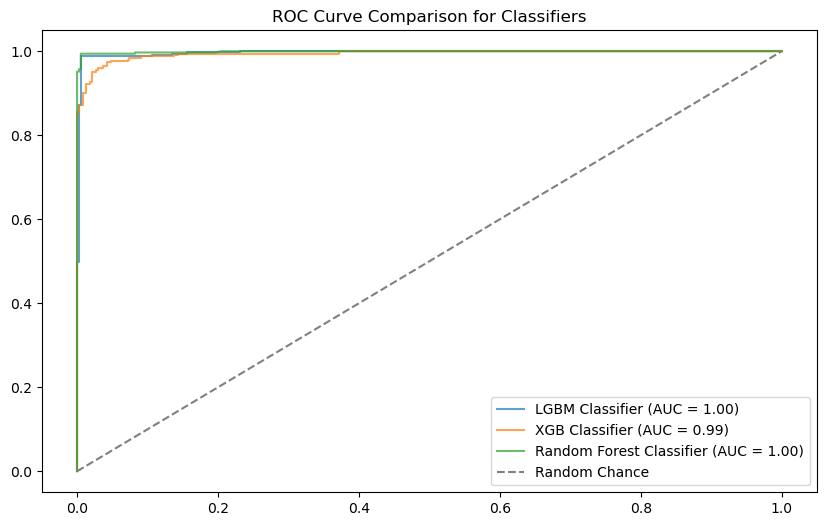

In [142]:
lgb_probs = lgb.predict_proba(x_test)[:, 1]
xgb_probs = xgb.predict_proba(x_test)[:, 1]
rfc_probs = rfc.predict_proba(x_test)[:, 1]

lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

lgb_auc = auc(lgb_fpr, lgb_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
rfc_auc = auc(rfc_fpr, rfc_tpr)


plt.figure(figsize=(10, 6))

# Adjust alpha for transparency
plt.plot(lgb_fpr, lgb_tpr, label=f'LGBM Classifier (AUC = {lgb_auc:.2f})', alpha=0.7)
plt.plot(xgb_fpr, xgb_tpr, label=f'XGB Classifier (AUC = {xgb_auc:.2f})', alpha=0.7)
plt.plot(rfc_fpr, rfc_tpr, label=f'Random Forest Classifier (AUC = {rfc_auc:.2f})', alpha=0.7)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

plt.title('ROC Curve Comparison for Classifiers')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Use In Other Domain :-
1 Education :-  Student Performance Prediction
2 Finance :-  Detecting Fraud
3 Marketing :- Quality Control
4 Demand Forecasting :- Predicting Sales Demand  
5 Telecommunications:-Network Anomaly Detection

Conclusion:-"In conclusion, our diabetes classification model, leveraging essential features such as Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, and Age, demonstrates robust predictive capabilities. These features collectively contribute to accurate diabetes risk assessment. Successful deployment of this model has the potential to aid early diagnosis and personalized intervention strategies for individuals at risk of diabetes."